# Importing libraries

In [1]:
import numpy as np
import pandas as pd

# Importing Dataset of 20,000 Reviews on IMDB

In [2]:
data = pd.read_excel('Dataset.xlsx')

data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


# Checking Dataset Details

In [3]:
data.tail()

,review,sentiment
19994,The story goes something like this: A small-to...,negative
19995,"ok. for starters, taxi driver is amazing. this...",negative
19996,"It's sort of hard for me to say it, because I ...",negative
19997,I still liked it though. Warren Beatty is only...,positive
19998,We could still use Black Adder even today. Ima...,positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 2 columns):
review       19999 non-null object
sentiment    19999 non-null object
dtypes: object(2)
memory usage: 312.6+ KB


In [5]:
data.describe()

,review,sentiment
count,19999,19999
unique,19925,2
top,Loved today's show!!! It was a variety and not...,negative
freq,4,10096


In [6]:
print(data.shape)

(19999, 2)


# sentiment count

In [7]:
data['sentiment'].value_counts()

negative    10096
positive     9903
Name: sentiment, dtype: int64

# Spliting the training dataset

In [8]:
#train dataset
train_reviews=data.review[:40000]
train_sentiments=data.sentiment[:40000]
#test dataset
test_reviews=data.review[40000:]
test_sentiments=data.sentiment[40000:]
print("train review & train_sentiments" , train_reviews.shape,train_sentiments.shape)
print("test reviews & test_sentiments" , test_reviews.shape,test_sentiments.shape)

train review & train_sentiments (19999,) (19999,)
test reviews & test_sentiments (0,) (0,)


# Text normalization ( Tokenization )

In [9]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords



In [10]:
#nltk.download()

In [11]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

# Removing all noise text ("cleaning text")

In [17]:
from bs4 import BeautifulSoup
import re

In [18]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

# Removing special characters

In [19]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

# Text stemming

In [20]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['review']=data['review'].apply(simple_stemmer)

# Removing stopwords

In [21]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

{'ma', 'what', 'once', 'itself', 'been', 'wouldn', "hadn't", 'am', 'to', 'and', 'the', 'he', 've', 'than', 'himself', 'so', 'needn', 'were', 'such', 'a', 'ourselves', 'while', "wasn't", 'didn', 'each', 'we', 'after', "should've", 'other', 'y', 'had', 'i', 'do', 'own', 'how', 'before', 're', 'me', "mustn't", 'by', "won't", 'aren', 'through', 'ain', 'that', 'why', 'about', "didn't", 'if', 'did', 'from', 'only', 'theirs', 'should', "wouldn't", "mightn't", 'those', 'more', 'has', 'not', "it's", 'under', 'but', 'mightn', 'at', 'above', "she's", 'just', "you'll", 'they', 'against', 'can', 'ours', 'themselves', 'll', 'nor', "needn't", 'some', 'down', 'yours', 'or', 'of', 'where', 'same', 'it', 'no', "weren't", 'for', 'very', 'between', 'most', 'few', 'which', 'won', 'her', 'she', 'hers', 'herself', 'them', 'are', 'off', 'as', 'on', 'too', "you're", 'with', 'being', 'yourself', "you'd", 's', 'is', 'yourselves', 'these', 'shouldn', 'during', "doesn't", 'couldn', 'be', 'over', 'shan', 'his', 'in

# Normalized train reviews

In [82]:
norm_train_reviews=data.review[:10000]
norm_train_reviews[0]

'one review ha mention watch 1 Oz episod youll hook right thi exactli happen meth first thing struck Oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call OZ nicknam given oswald maximum secur state penitentari focu mainli emerald citi experi section prison cell glass front face inward privaci high agenda Em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injust crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi wat

# Normalized test reviews

In [121]:
norm_test_reviews=data.review[10000:]
norm_test_reviews[15000]

'thi movi realli show age print saw wa terribl due age possibl better print howev thi wa major problem movi problem wa although film wa made 1933 wa essenti silent film onli barest dialog scatter onli sentenc film amateur fashion sometim charact back turn talk hand faces pathet attempt obscur lip cleaverli hide fact film wa dub well true thi czech film would need dub mani languag thi way wa realli stupid obviou look cheapoveral film look low budget silli realli shame though becau wa grain good storya young woman marri older man either gay andor ha interest women 21st centuri peopl would realli sit thi archaic mess even glimp nake somewhat chunki hedi lamarr isnt worth fuss accompani film debut even 1933 standard thi film wa poorli made dud onli interest thing film see differ lamarr look 1933 compar glamor imag hollywood creat came americash look like 2 complet differ peopleit incomplet look technic inferior film dont see ha gotten rave review technic problem alon movi cant rate 10 anyt

# Using only Bags of words model



It is used to convert text documents to numerical vectors or bag of words.

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

In [85]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (10000, 1824424)
BOW_cv_test: (9999, 1824424)


# Encoding

Labeling the sentiment text

In [86]:
from sklearn.preprocessing import LabelBinarizer

In [87]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(19999, 1)


# Spliting data (Sentiments)

In [88]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:10000]
test_sentiments=sentiment_data[10000:]

In [89]:
print(train_sentiments)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]


In [90]:
print(test_sentiments)

[[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [1]]


# Modelling the dataset using Machine Learning Algorithms

# 1 : Logistic regression with Bag-of-words 

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=200,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)

/Users/malik96/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/malik96/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


### model performance

In [93]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

[1 0 0 ... 1 1 1]


### Accuracy of the model

In [94]:
from sklearn.metrics import accuracy_score


In [95]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

lr_bow_score : 0.7086708670867087


## Classification report

### Accuracy, Precision, Recall and F1 score points.

In [97]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [98]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.73      0.68      0.71      5124
    Negative       0.69      0.74      0.71      4875

    accuracy                           0.71      9999
   macro avg       0.71      0.71      0.71      9999
weighted avg       0.71      0.71      0.71      9999



## Confusion Matrix

In [99]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)

[[3585 1290]
 [1623 3501]]


# 2 : Building Linear SVM  with BOW 

In [101]:
from sklearn.linear_model import SGDClassifier

In [103]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


### Model performance on test data

In [104]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)

[1 1 1 ... 1 1 1]


### Accuracy of the model

In [105]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

svm_bow_score : 0.6351635163516351


## Classification report

### Accuracy, Precision, Recall and F1 score points.

In [106]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)

              precision    recall  f1-score   support

    Positive       0.85      0.35      0.49      5124
    Negative       0.58      0.94      0.71      4875

    accuracy                           0.64      9999
   macro avg       0.72      0.64      0.60      9999
weighted avg       0.72      0.64      0.60      9999



### Plotting confusion matrix for it

In [108]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)

[[4567  308]
 [3340 1784]]


# 3: Multinomial Naive Bayes for bag of words

In [111]:
from sklearn.naive_bayes import MultinomialNB

In [112]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


### Model performance on test data

In [114]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)

[1 1 0 ... 1 1 1]


### Accuracy of the model

In [115]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)

mnb_bow_score : 0.7199719971997199


### classification report

### Accuracy, Precision, Recall and F1 score points.

In [116]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)

              precision    recall  f1-score   support

    Positive       0.72      0.75      0.73      5124
    Negative       0.72      0.69      0.71      4875

    accuracy                           0.72      9999
   macro avg       0.72      0.72      0.72      9999
weighted avg       0.72      0.72      0.72      9999



### Plot the confusion matrix

In [117]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)

[[3347 1528]
 [1272 3852]]


# WordNet

In [118]:
import nltk
from nltk.corpus import wordnet     #Import wordnet from the NLTK

In [122]:
first_word = wordnet.synset("Travel.v.01")
second_word = wordnet.synset("Walk.v.01")
print('Positive Review Similarity: ' + str(first_word.wup_similarity(second_word)))
first_word = wordnet.synset("Good.n.01")
second_word = wordnet.synset("zebra.n.01")
print('Negative Review Similarity: ' + str(first_word.wup_similarity(second_word)))

Positive Review Similarity: 0.6666666666666666
Negative Review Similarity: 0.09090909090909091


# Extra Work

# WordCloud for Positive Reviews

In [125]:
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

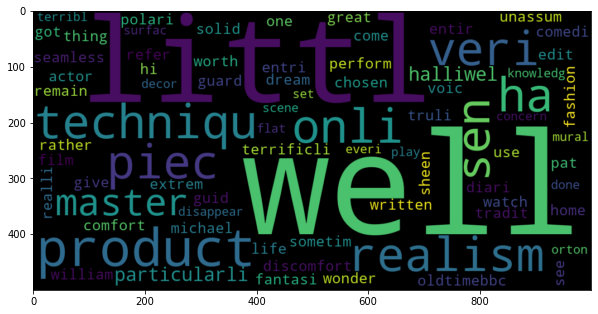

In [126]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

# WordCloud for Negative Reviews

<function matplotlib.pyplot.show(*args, **kw)>

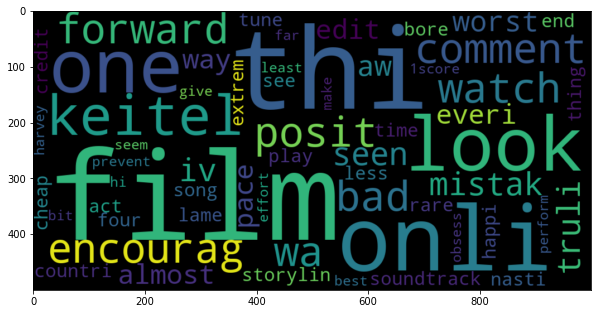

In [127]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

# Conclusion